# Segregation
- Micro-motives and macro-behavoir.
- Personal preferences lead to collective actions.
- Global patterns of spatial segregation from homophily at a local level.
- Segregated race, ethnicity, native language, income.
- Cities are strongly raciallyseegregated. Are people that racists.
- Agent based modelling: agents, rules(dynamics), aggregation.

*How come does that happenning?*

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize

import networkx as nx

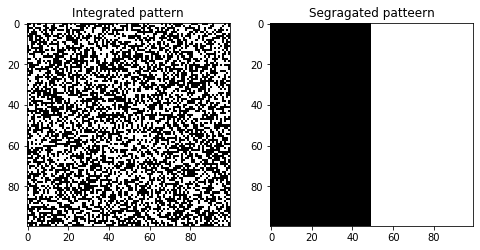

In [3]:
integrated = np.round(np.random.random(size = (100,100)))
segregated = np.c_[np.zeros((100,50)),np.ones((100,50))]

figsize(8,4)
plt.subplot(1,2,1)
plt.imshow(integrated,cmap = 'gray')
plt.title('Integrated pattern')
plt.subplot(1,2,2)
plt.imshow(segregated,cmap = 'gray')
plt.title('Segragated patteern')
plt.show()

## Schelling's model of segregation
- Population consists of 2 types of agents.
- Agent reside in the cell of the grid (2-dimensional geography of  a city), 8 neighbors.
- Some cells contain agents, some unpopulated.
- Every agent wants to have at least some fraction of agents (threshold) of his type as neighbor (satisfied agent)
- On every round every unsatisfied agent moves to a satisfictory empty cell.
- Continues until everyone is satisfied or can't move.

*Simulation*

In [0]:
def random_empty_place(V):
    xs, ys = np.where(V == 0)
    loc = np.random.choice(np.arange(len(xs)))
    x,y = xs[loc],ys[loc]
    return x,y

def shuffule_empties(V):
    xs,ys = np.where(V == 0)
    seq = np.arange(len(xs))
    np.random.shuffle(seq)
    xs,ys = xs[seq],ys[seq]
    return tuple(zip(xs,ys))

def satisfy(V,i,j,center = None):
    w,h = V.shape
    xmin,xmax,ymin,ymax = max(i-1,0),min(i+2,h),max(j-1,0),min(j+2,w)
    sub = V[xmin:xmax,ymin:ymax].copy()
    if center is None:
        center = V[i,j]
    ones = len(np.where(sub == 1)[0])
    twos = len(np.where(sub == 2)[0])

    if center == 1:
        ones = ones -1
    
    if center == 2:
        twos = twos - 1

    # in casee all neighbors are zeros
    if ones + twos == 0:
        # if 0 is in ceter
        if center == 0:
            return 1
        # if 1 or 2 in center
        else:
            return 0
       
    if center == 1:
        return ones / (ones + twos)
    elif center == 2:
        return twos / (ones + twos)
    else:
        return 1

def satisfy_matrix(V):
    S = np.empty(V.shape)
    h,w = V.shape
    for i in range(h):
        for j in range(w):
            S[i,j] = satisfy(V,i,j)
    return S

In [0]:
def schelling_model(h = 30,w = 30,empty_ratio = .2, thresh = .5, max_iters = 1000):

    # initialization
    V = (np.round(np.random.random(size = (h,w))) + 1).astype(int)
    empty_vec = np.random.random(size = (h,w)) < empty_ratio
    V[empty_vec] = 0
    V_init = V.copy()

    for i in range(max_iters):
        # calculate initial satisfactory
        S = satisfy_matrix(V)

        # unsatisfied cells
        dis_loc = np.where(S < thresh)
        dis_cell = tuple(zip(dis_loc[0],dis_loc[1]))

        if len(dis_cell) == 0:
            print('Taking {} iterations to satisfy.'.format(i))
            break

        # choose one to move
        idx_to_move = np.random.choice(range(len(dis_cell)))
        ax, ay = dis_cell[idx_to_move]

        # loop through an empty cell sequence
        for x,y in shuffule_empties(V):
            # if put a value satisfied, reset corresponding cells
            if satisfy(V,x,y,V[ax,ay]):
                V[x,y] = V[ax,ay]
                V[ax,ay] = 0
                break
    return (V_init,V)

In [101]:
V_init,V = schelling_model(h = 50,
                w = 50,
                empty_ratio = .2, 
                thresh = .5, 
                max_iters = 3000)

Taking 1396 iterations to satisfy.


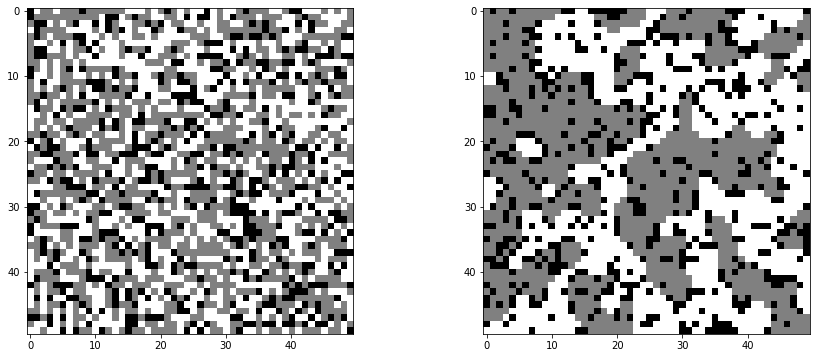

In [102]:
figsize(15,6)
plt.subplot(1,2,1)
plt.imshow(V_init,cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(V,cmap = 'gray')
plt.show()